# Lending Club Default Analysis
The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendations

In [98]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
loan_data=pd.read_csv("loan.csv", header = 0)

In [78]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


# lets try to have a look at the data in loan data set

In [100]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### there are 111 columns which is huge data lets try to find out what are the column names and get important columns

In [65]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

clearly we can see some important columns in this list for this case study which are loan_amnt, funded_amnt, funded_amnt_inv,term,int_rate,grade etc
as per the problem statement and businuess objective we have loan_status which is our target column and The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

# Data Cleanup
lets check the column which has most missing values and remove them if the percentage of missing vale is more than 85%

In [101]:
# percentage of missing values in each column
columns_missing_values=round(loan_data.isnull().sum()/len(loan_data.index), 2)*100
print(columns_missing_values)


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


there are many columns that has 100% missing values lets remove these columns from our data set

In [102]:
# get the names of columns having more than 85% missing values
columns_missing_data = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 85]
print(columns_missing_data)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [103]:
# remove the columns from our data set using drop()
print('before droping the columns !!!')
print(loan_data.shape)
loan_data = loan_data.drop(columns_missing_data, axis=1)
print('after dropping the columns with more than 85% missing data!!!')
print(loan_data.shape)


before droping the columns !!!
(39717, 111)
after dropping the columns with more than 85% missing data!!!
(39717, 55)


now we see a huge difference in column count as you can see 50% of columns had missing data and we got it removed!!!

### let find out if there are any columns that are having null values in there rows 

In [104]:
loan_data.isnull().sum()/len(loan_data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [105]:
# we can see that there are two columns 'mths_since_last_delinq' and 'desc' both have more than 30% of missing values
#lets check what kind of that these columns have       

loan_data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


#### both the columns have data which does not have much impact on the target variable loan_status so lets drop these columns 

In [106]:
# dropping the two columns
loan_data = loan_data.drop(['desc', 'mths_since_last_delinq'], axis=1)
print(loan_data.shape)

(39717, 53)


now we can see we have columns count has been reduced by 2 that means we have removed 'desc' and 'mths_since_last_delinq' columns

In [107]:
# checking all the columns for data type for each column 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

looking upon this data we can see 'int_rate' column is object but it should be float
lets change the type of this column to float

In [108]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [87]:
# checking the data types
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Now lets take the column 'emp_length' this is the total years of exprience of an employee 
this column is of type Object lets conver it to numeric and drop the rows it there are any nulls

In [109]:
print(loan_data.shape)
loan_data = loan_data[~loan_data['emp_length'].isnull()]
print(loan_data.shape)

(39717, 53)
(38642, 53)


before removing null values the rows count was 39717 and after removing null values count is 38642

# Data Analysis 
let start analysing the data we have now

in this analysis we need to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  to find this will try to create a new Data set with only required columns from our current data ser(loan_data).
1) lets take the columns that are related to applicant like emp_length which is level of experience, age of borrowers, anual income etc
2) now lets get the columns that are related to loan like purpose,loan_amount,loan intrest etc
other then these two type all the columns are not required so lets get it removed. 

In [119]:
new_loan_data=loan_data.drop(['id','delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'title',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type', 'url', 
 'zip_code', 'addr_state','dti','collections_12_mths_ex_med',
 'member_id','delinq_amnt','tax_liens','policy_code',
 'acc_now_delinq','chargeoff_within_12_mths'], axis=1)
print(new_loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt           38642 non-null  int64  
 2   funded_amnt_inv       38642 non-null  float64
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  float64
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_title             37202 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  pymnt_plan         

Now we have only 24 columns and we can now start our analysis let take the target column which is loan_status and try to form category based on this column 

In [117]:
new_loan_data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

lets get only the rows of fully paid and charges off as based on this we can predict if the customer is going to be a defaulter or not and we need to approve the loan application or not

In [122]:
#taking only complted loans into consideration 
new_loan_data = new_loan_data[new_loan_data['loan_status'] != 'Current']
new_loan_data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [123]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_title             36136 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  issue_d               37544 non-null  object 
 14  loan_status           37544 non-null  object 
 15  pymnt_plan         

# Univariate analysis
let start with single columns analysis so to find out how many applicants in past has defaulted there loan lets create a count plot 

<Axes: xlabel='loan_status', ylabel='Count'>

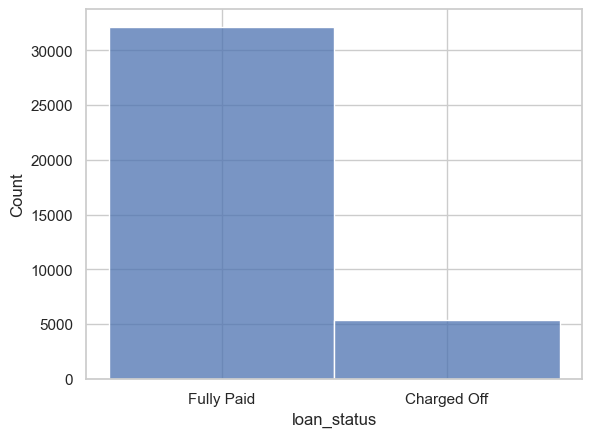

In [136]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.histplot(data=new_loan_data, x="loan_status")

the above histpolt shows that there are almost 14.38 percent of borrowers who defaulted there loan

In [132]:
# to check the percentage
new_loan_data['loan_status'].value_counts()/len(new_loan_data.index)*100

Fully Paid     85.61954
Charged Off    14.38046
Name: loan_status, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Density'>

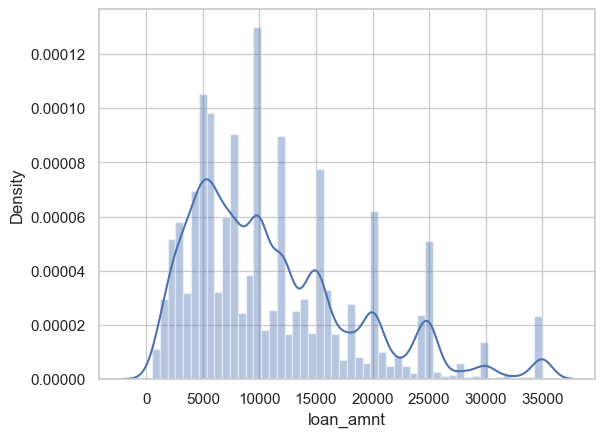

In [138]:
# lets analyse the loan amount given by the bank 
sns.distplot(new_loan_data['loan_amnt'])

In [143]:
# lets check the data from start time to end time that is based on years how many applicants have got the loan and when
new_loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [ ]:
# since the date is not a proper date its just YYY-MM format we need to correct the date 
from datetime import datetime
new_loan_data['issue_d'] = new_loan_data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [144]:
# extracting month and year from issue_date
new_loan_data['month'] = new_loan_data['issue_d'].apply(lambda x: x.month)
print(new_loan_data['month'])
new_loan_data['year'] = new_loan_data['issue_d'].apply(lambda x: x.year)
print(new_loan_data['year'])

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 37544, dtype: int64
0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 37544, dtype: int64


In [154]:
# let's first observe the number of loans granted across years
year_loan_percent=new_loan_data.groupby('year').year.count()/len(new_loan_data.index)*100
year_loan_percent.values

array([ 0.6685489 ,  4.16045174, 12.56126145, 29.86895376, 52.74078415])

<Axes: xlabel='year', ylabel='Density'>

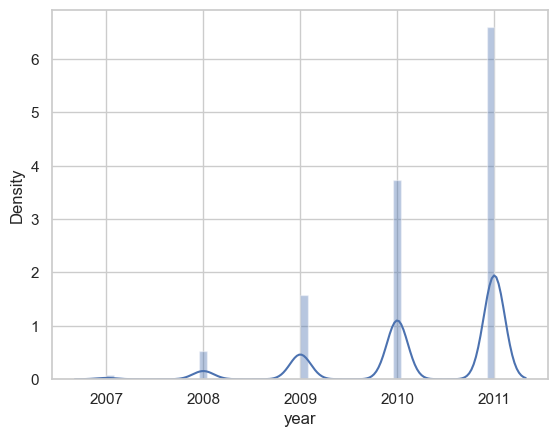

In [158]:
# lets check this data based on years as which year bank has given more loan
sns.distplot(new_loan_data['year'])

clearly the there is an increment in the applicants through the years

# Bivariate Analysis 
lets check how the defaulters percentage change based on other factors

In [164]:
# lets change the values of loan status column to 0 and 1 based on fully paid and chargedoff values
new_loan_data['loan_status'] = new_loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
new_loan_data['loan_status'] = new_loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
new_loan_data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [165]:
# lets define a function to plot loan_status across categorical variables
def plot_categorical_data(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=new_loan_data)
    plt.show()

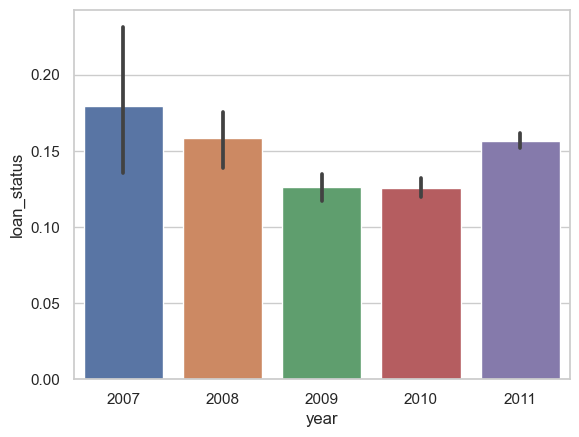

In [167]:
# compare default rates across years
plot_categorical_data('year')

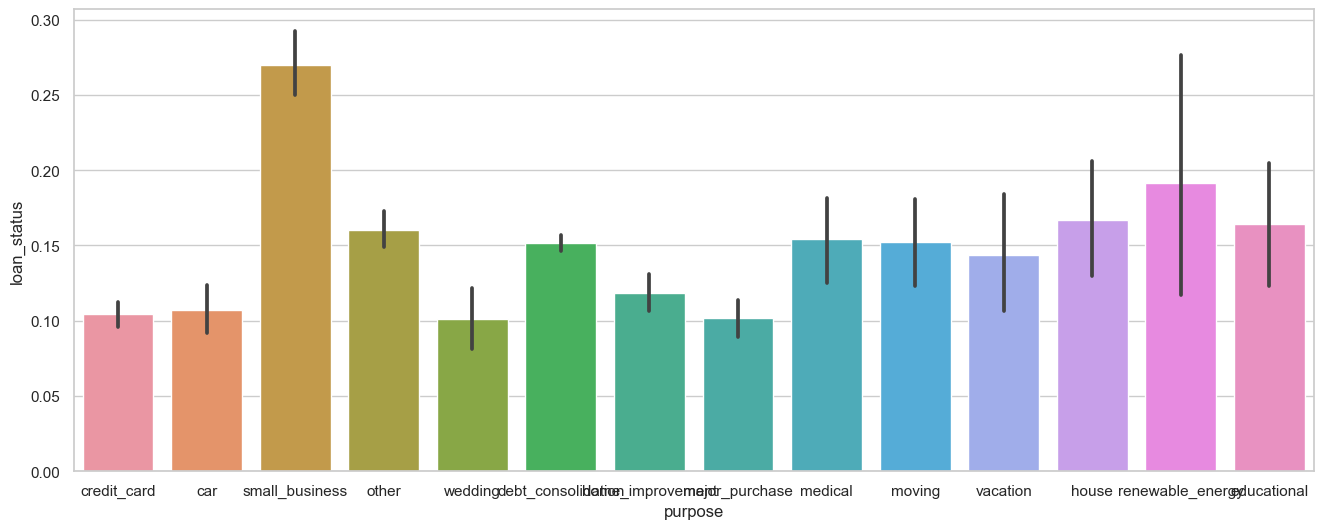

In [169]:
# lets find the defaul rate against purpose
plt.figure(figsize=(16, 6))
plot_categorical_data('purpose')

here we can conclude that small business has the highest rate of defaulters

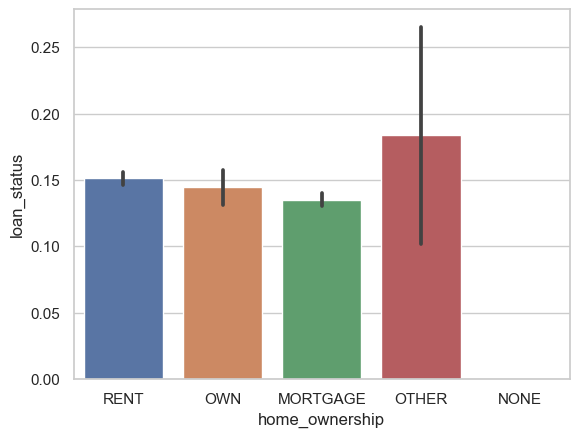

In [177]:
# home ownership: not a great discriminator
plot_categorical_data('home_ownership')

In [ ]:
# lets check based on the anual income category as high, very high, medium and low let convert annual income to categorical data
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

new_loan_data['annual_inc'] = new_loan_data['annual_inc'].apply(lambda x: annual_income(x))

<Axes: xlabel='annual_inc', ylabel='loan_status'>

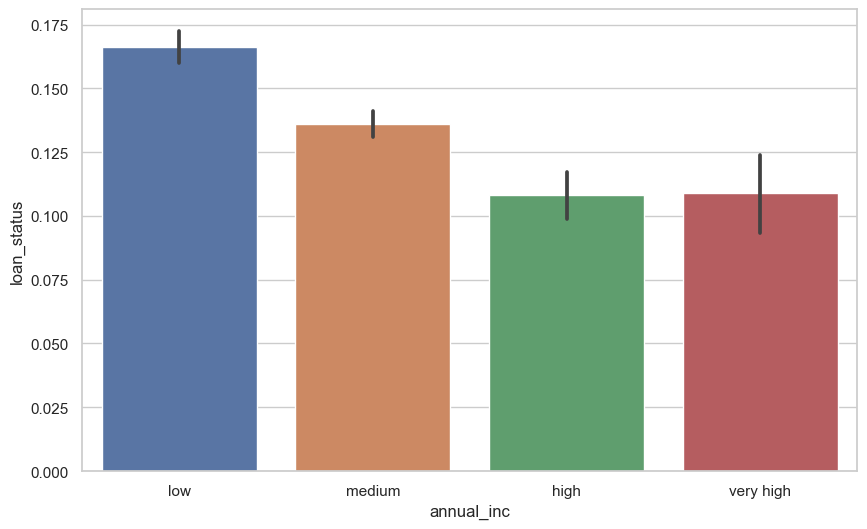

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', data=new_loan_data)

<Axes: >

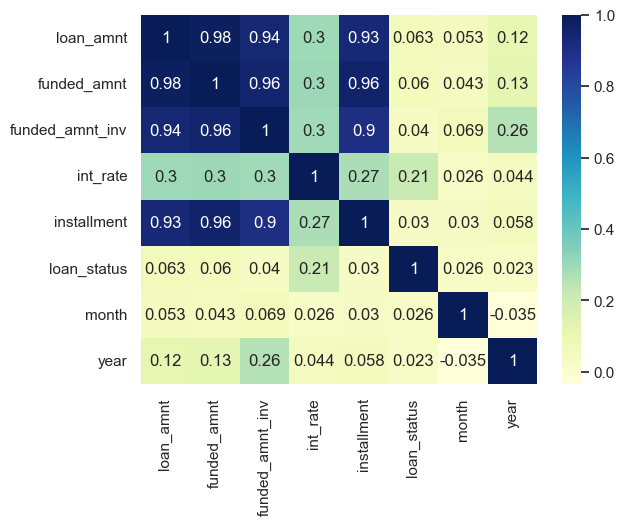

In [192]:
sns.heatmap(new_loan_data.corr(),cmap="YlGnBu",annot=True)

with the above corelation polt we can conclude that loan_status are intrest_rate are strongly corelated